In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

from toai.imports import *

from data import DataContainer
from image import *
from transformations import ImageParser, ImageCropTransformation, ImageLRFlpTransformation

In [3]:
tf.debugging.set_log_device_placement(False)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            print(gpu)
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [4]:
DATA_DIR = Path('data')
TEMP_DIR = Path('temp')
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
TRAIN_DIR = DATA_DIR/'train'
images = [str(TRAIN_DIR/label_dir/val) for label_dir in os.listdir(TRAIN_DIR) for val in os.listdir(TRAIN_DIR/label_dir)]

In [6]:
train_df = pd.DataFrame()
train_df['path'] = images
train_df['label'] = train_df['path'].apply(lambda path : path.split("/")[2])

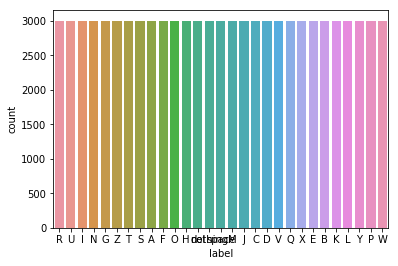

In [8]:
sns.countplot(x='label', data=train_df);

In [7]:
TEST_DIR = DATA_DIR/'test'
test_images = [str(TEST_DIR/val) for val in os.listdir(TEST_DIR)]

In [8]:
test_df = pd.DataFrame()
test_df['path'] = test_images
test_df['label'] = test_df['path'].apply(lambda path : path.split("/")[-1].split("_")[0])

In [11]:
test_df.head()

,path,label
0,data/test/F_test.jpg,F
1,data/test/G_test.jpg,G
2,data/test/L_test.jpg,L
3,data/test/M_test.jpg,M
4,data/test/R_test.jpg,R


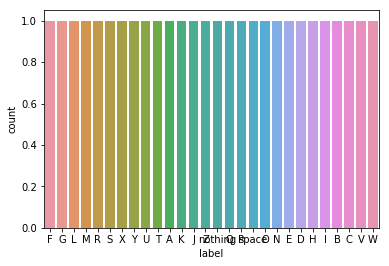

In [12]:
sns.countplot(x='label', data=test_df);

In [9]:
IMG_DIMS = (150, 150, 3)

In [10]:
train_data, validation_data = train_test_split(train_df, test_size=0.2)

In [11]:
test_data = test_df.copy()

In [12]:
[data.shape for data in [train_data, validation_data]]

[(69600, 2), (17400, 2)]

In [14]:
base_config = ImageDatasetConfig(
    img_dims=IMG_DIMS,
    batch_size=16,
    preprocess_pipeline=[
        ImageParser()
    ],
)

train_dataset = ImageDataset(base_config.copy(
        preprocess_pipeline=[
            ImageLRFlpTransformation()
        ],
        shuffle=True,
    )).build_from_df(train_data, 'path', 'label')

data_container = DataContainer(
    train=train_dataset,
    validation=ImageDataset(base_config.copy(
        preprocess_pipeline = [
            ImageLRFlpTransformation(),
        ],
    ))
        .with_label_map(train_dataset.label_map)
        .build_from_df(validation_data, 'path', 'label'),
    test=ImageDataset(base_config.copy(
        preprocess_pipeline=[
            ImageCropTransformation(IMG_DIMS)
        ],
    )).build_from_df(test_data, 'path', 'label'),
)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


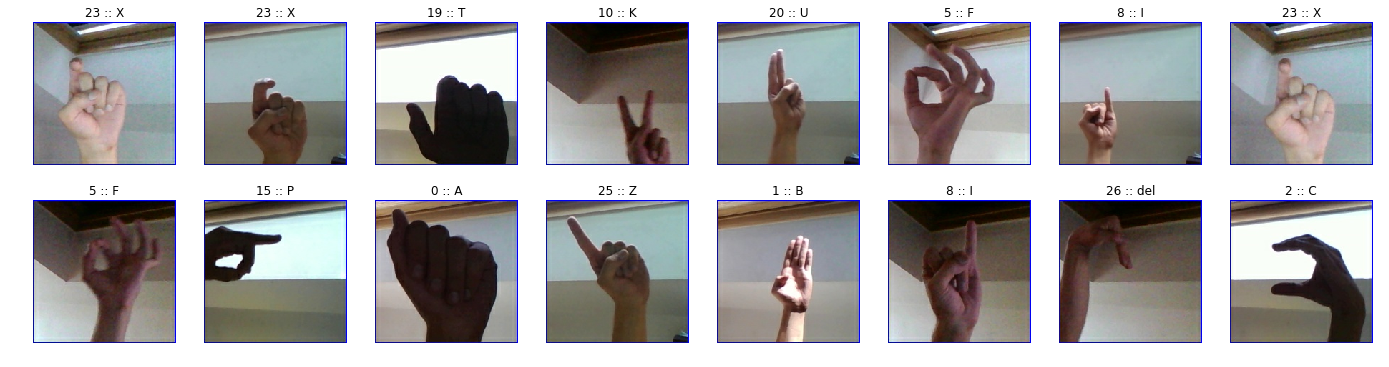

In [27]:
data_container.train.show()

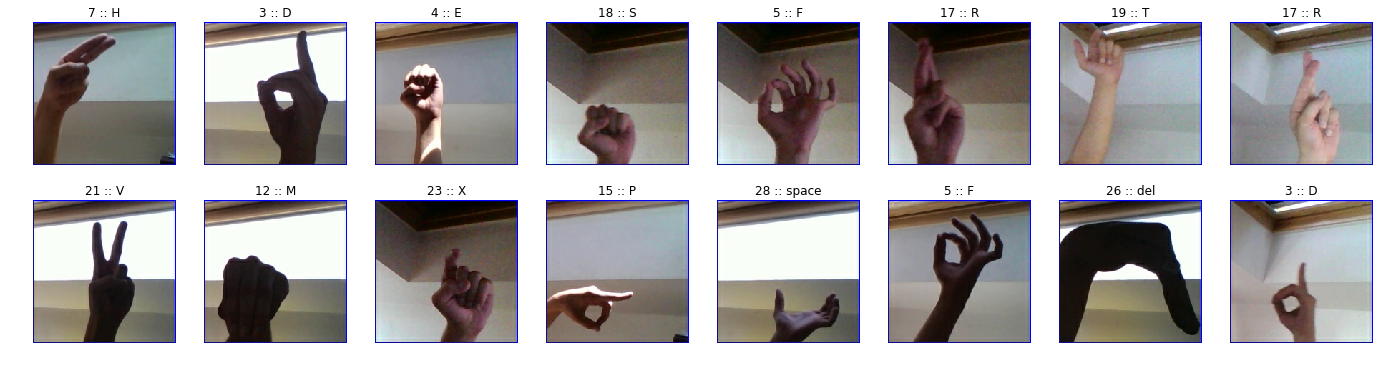

In [28]:
data_container.validation.show()